In [1]:
import sys
if ".." not in sys.path:
    sys.path.append("..")

In [2]:
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
import jax
import jax.numpy as jnp

from typing import Iterable

from model.cortical_column import CorticalColumn
from model.hyperparameters import dt, cortical_column_hyperparameters

In [4]:
def simulate_cortical_column(
    cortical_column: CorticalColumn,
    lrei: Iterable[jax.Array],
    lrii: Iterable[jax.Array],
    ei: Iterable[jax.Array],
    ii: Iterable[jax.Array],
    key: jax.Array
):
    inputs = iter(zip(lrei, lrii, ei, ii))
    first_input = next(inputs)

    state = CorticalColumn.init_state(first_input[0])
    # yield cortical_column.get_pyramidal_firing_rate(state, first_input[0]

    key, new_key = jax.random.split(key)
    state, pfr = cortical_column(state, *first_input, new_key)
    yield pfr

    for input in inputs:
        key, new_key = jax.random.split(key)
        state, pfr = cortical_column(state, *input, new_key)
        yield pfr

In [5]:
cortical_column = CorticalColumn(cortical_column_hyperparameters._replace(c_pp=0), dt)

In [6]:
T = 1
n = int(T/dt)
key = jax.random.key(0)
inputs = (
    jnp.zeros((n,)),
    jnp.zeros((n,)),
    600*jnp.ones((n,)),
    jnp.zeros((n,)),
)  # type: ignore

t = jnp.arange(0, T, dt)
psp = list(tqdm(simulate_cortical_column(cortical_column, *inputs, key), total=n))  # type: ignore

100%|███████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3539.36it/s]


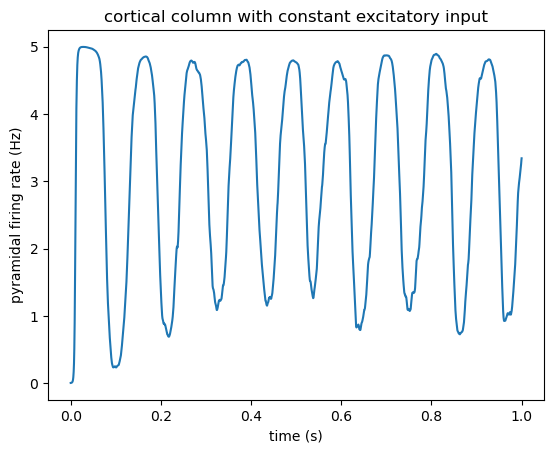

In [7]:
fig, ax = plt.subplots()
ax.plot(t, psp)
ax.set_title("cortical column with constant excitatory input")
ax.set_xlabel("time (s)")
ax.set_ylabel("pyramidal firing rate (Hz)")
plt.show()